# PRACTICA MODELOS DE CLASIFICACIÓN

### Dataset de préstamos pasados, que incluye 346 clientes cuyo préstamo fue atendido o impagado

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('M101traindata.csv',parse_dates=['effective_date','due_date'])
print(data.shape)
data.head()

(346, 10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      346 non-null    int64         
 1   Unnamed: 0.1    346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


In [4]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [5]:
data.loan_status.value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

- Vemos que hay un desequlibrio en las clases del target, siendo Collection la clase minoritaria al representar 1/3 del target. Trataremos este tema más abajo

- Repartición por Sexo y principal

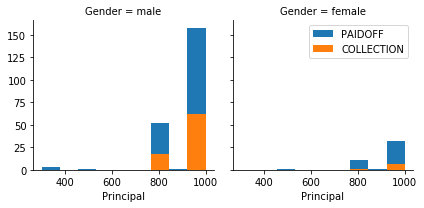

In [7]:
import numpy as np
bins = np.linspace(data.Principal.min(), data.Principal.max(), 10)
g = sns.FacetGrid(data, col="Gender", hue="loan_status", col_wrap=2)
g.map(plt.hist, 'Principal',bins=bins)

g.axes[-1].legend()
plt.show()

- Repartición por sexo y por edad

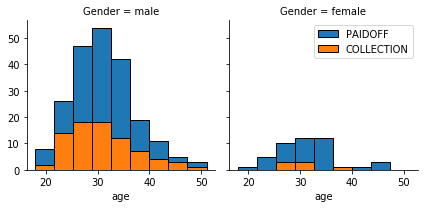

In [8]:
bins = np.linspace(data.age.min(), data.age.max(), 10)
g = sns.FacetGrid(data, col="Gender", hue="loan_status", col_wrap=2)
g.map(plt.hist, 'age',bins=bins,ec='k')

g.axes[-1].legend()
plt.show()

- Repartición por sexo y por día de la semana

In [9]:
data['dayofwekk']=data.effective_date.dt.dayofweek


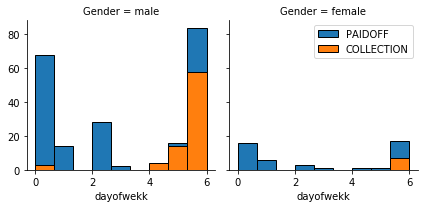

In [10]:
bins = np.linspace(data.dayofwekk.min(), data.dayofwekk.max(), 10)
g = sns.FacetGrid(data, col="Gender", hue="loan_status", col_wrap=2)
g.map(plt.hist, 'dayofwekk',bins=bins,ec='k')

g.axes[-1].legend()
plt.show()

- Vemos que cuando el préstamo es concedido en fin de semana es donde se concentran los préstamos impagados, vamos a crear una columna que refleje esto

In [11]:
pd.crosstab(data.dayofwekk,data.loan_status)

loan_status,COLLECTION,PAIDOFF
dayofwekk,,
0,3,84
1,0,20
2,0,31
3,0,3
4,4,4
5,14,17
6,65,101


In [12]:
data.head(1)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofwekk
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3


In [13]:
data['weekend']=data.dayofwekk.apply(lambda x: 1 if (x>3) else 0)
data.head(1)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofwekk,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0


In [14]:
pd.crosstab(data.Gender,data.loan_status)

loan_status,COLLECTION,PAIDOFF
Gender,,
female,7,45
male,79,215


La mayor parte de impagos son de hombres

- Vemos los porcentajes

In [15]:
data.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

### Tratamiento de variables X no númericas

- Reemplazamos male and female por 0 y 1

In [16]:
data['Gender'].replace(['male','female'],[0,1],inplace=True)

In [17]:
pd.crosstab(data.education,data.loan_status)

loan_status,COLLECTION,PAIDOFF
education,,
Bechalor,11,33
High School or Below,39,112
Master or Above,1,1
college,35,114


 Porcentajes 

In [18]:
data.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

- Utilizamos One-hot Encoding para transformar numéricamente la columna de educación

In [19]:
Feature = data[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(data['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


## PREPARACIÓN Y NORMALIZACIÓN DEL TEST Y TRAINING DATA

In [20]:
X=Feature
y=data['loan_status']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
standard=StandardScaler()
X_train_normalized=standard.fit_transform(X_train)
X_test_normalized=standard.fit_transform(X_test)

- La variable dependiente está bastante desequilibrada, COLLECTION tiene un peso de alrededor el 25% y PAIDOFF del 75%. Hay que tener en cuenta el problema que esto puede suponer, ya que los modelos tienden a generalizar sobre la clase mayoritaria.

- En algunos modelos vamos a probar alguna de las técnicas que existen para desequilibrar el balanceo y comprobar si conseguimos mejores resultados

- Por el dataset en concreto, el método de evaluación que más nos interesa controlar es el recall de Collection, ya que lo realmente importante es que no se cataloguen como "al día" préstamos que no han sido pagados

### Técnicas que vamos a utilizar para equilibrar las clases:

- Hiperparámetro balanced
- Técnica Smote-Tomek: consiste en aplicar en simultáneo un algoritmo de subsampling y otro de oversampling a la vez al dataset. En este caso usaremos SMOTE para oversampling: busca puntos vecinos cercanos y agrega puntos «en linea recta» entre ellos. Y usaremos Tomek para undersampling que quita los de distinta clase que sean nearest neighbor y deja ver mejor el decisión boundary (la zona limítrofe de nuestras clases).

- Vamos a instanciar X_train y_train con la técnica Smote Tomek para utilizar en algunos algoritmos

In [23]:
from imblearn.combine import SMOTETomek
os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_sample(X_train_normalized, y_train)


# DIFERENTES MODELOS DE MACHINE LEARNING

### DECISION TREE

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

In [25]:
parameters={'max_depth':[2,3,5,7,9,11,13,15]}
tree=DecisionTreeClassifier()
grid=GridSearchCV(tree,param_grid=parameters).fit(X_train_normalized,y_train)

In [26]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 2}
0.7572727272727273


In [27]:
tree=DecisionTreeClassifier(max_depth=2).fit(X_train_normalized,y_train)
y_pred=tree.predict(X_test_normalized)
print('TRAIN SCORES:',tree.score(X_train_normalized,y_train), 'TEST SCORE:', tree.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.7572463768115942 TEST SCORE: 0.7285714285714285
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        19
     PAIDOFF       0.73      1.00      0.84        51

    accuracy                           0.73        70
   macro avg       0.36      0.50      0.42        70
weighted avg       0.53      0.73      0.61        70

col_0        PAIDOFF
loan_status         
COLLECTION        19
PAIDOFF           51


C:\Users\Usuario\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Utilizamos el hiperparámetro class_weight para equilibrar las clases del target

In [28]:
tree=DecisionTreeClassifier(max_depth=2, class_weight='balanced').fit(X_train_normalized,y_train)
y_pred=tree.predict(X_test_normalized)
print('TRAIN SCORES:',tree.score(X_train_normalized,y_train), 'TEST SCORE:', tree.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.6594202898550725 TEST SCORE: 0.6571428571428571
              precision    recall  f1-score   support

  COLLECTION       0.44      1.00      0.61        19
     PAIDOFF       1.00      0.53      0.69        51

    accuracy                           0.66        70
   macro avg       0.72      0.76      0.65        70
weighted avg       0.85      0.66      0.67        70

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION           19        0
PAIDOFF              24       27


In [29]:
recall_tree_balanced=recall_score(y_test,y_pred,pos_label='COLLECTION')

### RANDOM FOREST

In [30]:
rf=RandomForestClassifier(n_estimators=200, max_depth=7).fit(X_train_normalized,y_train)
y_pred=rf.predict(X_test_normalized)
print('TRAIN SCORES:',rf.score(X_train_normalized,y_train), 'TEST SCORE:', rf.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))


TRAIN SCORES: 0.8405797101449275 TEST SCORE: 0.7285714285714285
              precision    recall  f1-score   support

  COLLECTION       0.50      0.16      0.24        19
     PAIDOFF       0.75      0.94      0.83        51

    accuracy                           0.73        70
   macro avg       0.62      0.55      0.54        70
weighted avg       0.68      0.73      0.67        70

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION            3       16
PAIDOFF               3       48


- Con hiperparámetro balanced

In [64]:
rf=RandomForestClassifier(n_estimators=200, max_depth=7,class_weight='balanced').fit(X_train_normalized,y_train)
y_pred=rf.predict(X_test_normalized)
print('TRAIN SCORES:',rf.score(X_train_normalized,y_train), 'TEST SCORE:', rf.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))


TRAIN SCORES: 0.822463768115942 TEST SCORE: 0.6857142857142857
              precision    recall  f1-score   support

  COLLECTION       0.45      0.74      0.56        19
     PAIDOFF       0.87      0.67      0.76        51

    accuracy                           0.69        70
   macro avg       0.66      0.70      0.66        70
weighted avg       0.76      0.69      0.70        70

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION           14        5
PAIDOFF              17       34


In [32]:
recall_rf_balanced=recall_score(y_test,y_pred,pos_label='COLLECTION')

- Probamos con cross validation

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
kf=KFold(n_splits=5)
scores=cross_val_score(rf,X_train_normalized,y_train,cv=5)
print('métricas cross validation:',scores)
print('media cross validation:',scores.mean())
preds = rf.predict(X_test)
score_pred =accuracy_score(y_test, preds)
 
print("Metrica en Test", score_pred)

métricas cross validation: [0.71428571 0.67272727 0.69090909 0.65454545 0.67272727]
media cross validation: 0.681038961038961
Metrica en Test 0.6428571428571429


### LOGISTIC REGRESION

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [34]:
parameters={'penalty':['l1','l2'],'C':[0.1,0.3,0.5,0.7,0.9,1.5,10]}
lr=LogisticRegression(solver='liblinear')
grid=GridSearchCV(lr,param_grid=parameters).fit(X_train_normalized,y_train)
grid.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [35]:
lr=LogisticRegression(penalty='l1',C=0.1,solver='liblinear').fit(X_train_normalized,y_train)
y_pred=lr.predict(X_test_normalized)
print('TRAIN SCORES:',lr.score(X_train_normalized,y_train), 'TEST SCORE:', lr.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.7572463768115942 TEST SCORE: 0.7285714285714285
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        19
     PAIDOFF       0.73      1.00      0.84        51

    accuracy                           0.73        70
   macro avg       0.36      0.50      0.42        70
weighted avg       0.53      0.73      0.61        70

col_0        PAIDOFF
loan_status         
COLLECTION        19
PAIDOFF           51


C:\Users\Usuario\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- PROBAMOS EL HYPERPARAMETRO CLASS_WEIGHT=BALANCED PARA EQUILIBRAR EL DESEQUILIBRIO ENTRE LAS 2 CLASES DEL TARGET

In [36]:
lr=LogisticRegression(penalty='elasticnet',l1_ratio=1,solver='saga',C=0.1,class_weight='balanced').fit(X_train_normalized,y_train)
y_pred=lr.predict(X_test_normalized)
print('TRAIN SCORES:',lr.score(X_train_normalized,y_train), 'TEST SCORE:', lr.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.6340579710144928 TEST SCORE: 0.6571428571428571
              precision    recall  f1-score   support

  COLLECTION       0.44      1.00      0.61        19
     PAIDOFF       1.00      0.53      0.69        51

    accuracy                           0.66        70
   macro avg       0.72      0.76      0.65        70
weighted avg       0.85      0.66      0.67        70

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION           19        0
PAIDOFF              24       27


In [37]:
recall_lr_balanced=recall_score(y_test,y_pred,pos_label='COLLECTION')
recall_lr_balanced

1.0

### K-NEIGHOURS

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
parameters={'n_neighbors':[1,3,5,7,8,9]}
kn=KNeighborsClassifier(weights='distance')
grid=GridSearchCV(kn,param_grid=parameters).fit(X_train_normalized,y_train)
grid.best_params_

{'n_neighbors': 1}

In [40]:
kn=KNeighborsClassifier(n_neighbors=8, weights='distance').fit(X_train_normalized,y_train)
y_pred=kn.predict(X_test_normalized)
print('TRAIN SCORES:',kn.score(X_train_normalized,y_train), 'TEST SCORE:', kn.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.9094202898550725 TEST SCORE: 0.7714285714285715
              precision    recall  f1-score   support

  COLLECTION       0.60      0.47      0.53        19
     PAIDOFF       0.82      0.88      0.85        51

    accuracy                           0.77        70
   macro avg       0.71      0.68      0.69        70
weighted avg       0.76      0.77      0.76        70

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION            9       10
PAIDOFF               6       45


Claro problema de overtifitting

In [41]:
recall_kn=recall_score(y_test,y_pred,pos_label='COLLECTION')


### SVC

In [42]:
from sklearn.svm import LinearSVC

In [43]:
parameters={'max_iter': [1000,5000,10000],'C':[0.1,0.3,0.5,0.7,0.8,1]}
svc=LinearSVC(dual=False,class_weight='balanced')
grid=GridSearchCV(svc,param_grid=parameters).fit(X_train_normalized,y_train)
grid.best_params_

{'C': 0.1, 'max_iter': 1000}

- Introducimos directamente el balanceo de datos para favorecer a la clase minoritaria

In [44]:
svc=LinearSVC(max_iter=1000,C=1, class_weight='balanced').fit(X_train_normalized,y_train)
y_pred=svc.predict(X_test_normalized)
print('TRAIN SCORES:',svc.score(X_train_normalized,y_train), 'TEST SCORE:', svc.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.6485507246376812 TEST SCORE: 0.6571428571428571
              precision    recall  f1-score   support

  COLLECTION       0.44      1.00      0.61        19
     PAIDOFF       1.00      0.53      0.69        51

    accuracy                           0.66        70
   macro avg       0.72      0.76      0.65        70
weighted avg       0.85      0.66      0.67        70

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION           19        0
PAIDOFF              24       27


In [45]:
recall_svc_balanced=recall_score(y_test,y_pred,pos_label='COLLECTION')


### NAIVE BAYES

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
gnb=GaussianNB().fit(X_train_normalized,y_train)
y_pred=gnb.predict(X_test_normalized)
print('TRAIN SCORES:',gnb.score(X_train_normalized,y_train), 'TEST SCORE:', gnb.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))


TRAIN SCORES: 0.6992753623188406 TEST SCORE: 0.6857142857142857
              precision    recall  f1-score   support

  COLLECTION       0.45      0.74      0.56        19
     PAIDOFF       0.87      0.67      0.76        51

    accuracy                           0.69        70
   macro avg       0.66      0.70      0.66        70
weighted avg       0.76      0.69      0.70        70

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION           14        5
PAIDOFF              17       34


In [48]:
recall_gb=recall_score(y_test,y_pred,pos_label='COLLECTION')


### EXTRA TREES CLASSIFIER

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

In [50]:
extra=ExtraTreesClassifier(n_estimators=200, max_depth=7,n_jobs=-1).fit(X_train_normalized,y_train)
y_pred=gnb.predict(X_test_normalized)
print('TRAIN SCORES:',extra.score(X_train_normalized,y_train), 'TEST SCORE:', extra.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.8405797101449275 TEST SCORE: 0.7142857142857143
              precision    recall  f1-score   support

  COLLECTION       0.45      0.74      0.56        19
     PAIDOFF       0.87      0.67      0.76        51

    accuracy                           0.69        70
   macro avg       0.66      0.70      0.66        70
weighted avg       0.76      0.69      0.70        70

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION           14        5
PAIDOFF              17       34


In [51]:
recall_extra=recall_score(y_test,y_pred,pos_label='COLLECTION')


- VAMOS A PROBAR EL MODELO DE BALANCEO SMOTE TOMEK

In [52]:
y_train.value_counts()

PAIDOFF       209
COLLECTION     67
Name: loan_status, dtype: int64

In [53]:
y_train_res.value_counts()

COLLECTION    201
PAIDOFF       201
Name: loan_status, dtype: int64

In [54]:
extra=ExtraTreesClassifier(n_estimators=200, max_depth=7,n_jobs=-1).fit(X_train_res,y_train_res)
y_pred=gnb.predict(X_test_normalized)
print('TRAIN SCORES:',extra.score(X_train_res,y_train_res), 'TEST SCORE:', extra.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.8383084577114428 TEST SCORE: 0.6428571428571429
              precision    recall  f1-score   support

  COLLECTION       0.45      0.74      0.56        19
     PAIDOFF       0.87      0.67      0.76        51

    accuracy                           0.69        70
   macro avg       0.66      0.70      0.66        70
weighted avg       0.76      0.69      0.70        70

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION           14        5
PAIDOFF              17       34


- No han supuesto grandes cambios de hecho ha empeorado el modelo al caer el test score

### ADABOOSTING CLASSIFIER

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
ada=AdaBoostClassifier(n_estimators=1000,learning_rate=1).fit(X_train_normalized,y_train)
y_pred=ada.predict(X_test_normalized)
print('TRAIN SCORES:',ada.score(X_train_normalized,y_train), 'TEST SCORE:', ada.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.7608695652173914 TEST SCORE: 0.6428571428571429
              precision    recall  f1-score   support

  COLLECTION       0.25      0.16      0.19        19
     PAIDOFF       0.72      0.82      0.77        51

    accuracy                           0.64        70
   macro avg       0.49      0.49      0.48        70
weighted avg       0.60      0.64      0.61        70

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION            3       16
PAIDOFF               9       42


- CON MODELO DE BALANCEO SMOTE TOMEK

In [57]:
ada=AdaBoostClassifier(n_estimators=1000,learning_rate=1).fit(X_train_res,y_train_res)
y_pred=ada.predict(X_test_normalized)
print('TRAIN SCORES:',ada.score(X_train_res,y_train_res), 'TEST SCORE:', ada.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.8582089552238806 TEST SCORE: 0.5
              precision    recall  f1-score   support

  COLLECTION       0.30      0.63      0.41        19
     PAIDOFF       0.77      0.45      0.57        51

    accuracy                           0.50        70
   macro avg       0.53      0.54      0.49        70
weighted avg       0.64      0.50      0.52        70

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION           12        7
PAIDOFF              28       23


- Conseguimos un 1 en recall de collection pero caemos en overfitting, mejora mucho el training y baja el test

### GRADIENT BOOSTING

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gb=GradientBoostingClassifier(n_estimators=1000,learning_rate=1,max_depth=3).fit(X_train_normalized,y_train)
y_pred=gb.predict(X_test_normalized)
print('TRAIN SCORES:',gb.score(X_train_normalized,y_train), 'TEST SCORE:', gb.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.9094202898550725 TEST SCORE: 0.7571428571428571
              precision    recall  f1-score   support

  COLLECTION       0.56      0.47      0.51        19
     PAIDOFF       0.81      0.86      0.84        51

    accuracy                           0.76        70
   macro avg       0.69      0.67      0.68        70
weighted avg       0.75      0.76      0.75        70

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION            9       10
PAIDOFF               7       44


In [60]:
from imblearn.ensemble import BalancedBaggingClassifier

In [61]:
bbc = BalancedBaggingClassifier(base_estimator=GradientBoostingClassifier(n_estimators=1000,learning_rate=1,max_depth=3),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc.fit(X_train_normalized, y_train)
pred_y = bbc.predict(X_test_normalized)
print('TRAIN SCORES:',bbc.score(X_train_normalized,y_train), 'TEST SCORE:', bbc.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.782608695652174 TEST SCORE: 0.7428571428571429
              precision    recall  f1-score   support

  COLLECTION       0.56      0.47      0.51        19
     PAIDOFF       0.81      0.86      0.84        51

    accuracy                           0.76        70
   macro avg       0.69      0.67      0.68        70
weighted avg       0.75      0.76      0.75        70

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION            9       10
PAIDOFF               7       44


- Aplicamos el Modelo de balanceo Smote Tomex y vemos que el recall de Collection, que es lo que nos interesa, mejora mucho pero volvemos a caer en overfitting por lo que no nos va a servir para generalizar bien datos nuevos

In [62]:
gb=GradientBoostingClassifier(n_estimators=1000,learning_rate=1,max_depth=3).fit(X_train_res,y_train_res)
y_pred=gb.predict(X_test_normalized)
print('TRAIN SCORES:',gb.score(X_train_res,y_train_res), 'TEST SCORE:', gb.score(X_test_normalized,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.9378109452736318 TEST SCORE: 0.6428571428571429
              precision    recall  f1-score   support

  COLLECTION       0.41      0.74      0.53        19
     PAIDOFF       0.86      0.61      0.71        51

    accuracy                           0.64        70
   macro avg       0.64      0.67      0.62        70
weighted avg       0.74      0.64      0.66        70

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION           14        5
PAIDOFF              20       31


# PRIMERAS CONCLUSIONES

- Hemos aplicado modelos de clasificación que nos han dado en general buenos training scores pero test scores regulares, entre el 0,6-0,7 máximo

- Hemos introducido varias ténicas de balanceo para equilibrar las dos clases del target. Estas técnicas han provocado en general overffiting, un incremento del score del training y un decremento en el test, por tanto generalizan peor.

- Sí hemos comprobado que las técnicas de balanceo utilizadas en todos los casos aumentan enormemente el recall de Collection, que es la técnica de evaluación que queríamos tomar como referencia.

- Es posible que la reducida dimensión del dataset dificulte el poder construir un modelo más robusto

# APLICAMOS LOS MODELOS ENTRENADOS SOBRE EL TEST

In [69]:
data_test=pd.read_csv('loan_test.csv',parse_dates=['effective_date','due_date'])
print(data_test.shape)
data_test.head()

data_test['dayofwekk']=data_test.effective_date.dt.dayofweek
data_test['weekend']=data_test.dayofwekk.apply(lambda x: 1 if (x>3) else 0)
data_test['Gender'].replace(['male','female'],[0,1],inplace=True)

Feature = data_test[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(data_test['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X_test_loan=Feature
y_test_loan=data_test['loan_status']

standard=StandardScaler()
X_test_loan=standard.fit_transform(X_test_loan)

(54, 10)


In [70]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,pos_label='COLLECTION')

In [75]:
print("KN F1 SCORE:", f1_score(y_test_loan, kn.predict(X_test_loan),average='weighted'), 
      'KN RECALL COLLECTION:', recall_score(y_test_loan,kn.predict(X_test_loan),pos_label='COLLECTION'))
print("ADA BOOSTING F1 SCORE:", f1_score(y_test_loan, ada.predict(X_test_loan),average='weighted'), 
      'ADA RECALL COLLECTION:', recall_score(y_test_loan,ada.predict(X_test_loan),pos_label='COLLECTION'))
print("SVC F1 SCORE:", f1_score(y_test_loan, svc.predict(X_test_loan), average='weighted'), 
      'SVC RECALL COLLECTION:', recall_score(y_test_loan,svc.predict(X_test_loan),pos_label='COLLECTION'))
print("TREE DECISION F1 SCORE:", f1_score(y_test_loan, tree.predict(X_test_loan), average='weighted'), 
      'TREE DECISION RECALL COLLECTION:', recall_score(y_test_loan,tree.predict(X_test_loan),pos_label='COLLECTION'))
print("EXTRA TREE F1 SCORE:", f1_score(y_test_loan, extra.predict(X_test_loan), average='weighted'), 
      'EXTRA TREE RECALL COLLECTION:', recall_score(y_test_loan,extra.predict(X_test_loan),pos_label='COLLECTION'))
print("GRADIENT BOOSTING F1 SCORE:", f1_score(y_test_loan, gb.predict(X_test_loan), average='weighted'), 
      'GRADIENT BOOSTING RECALL COLLECTION:', recall_score(y_test_loan,gb.predict(X_test_loan),pos_label='COLLECTION'))
print("RANDOM FOREST F1 SCORE:", f1_score(y_test_loan, rf.predict(X_test_loan), average='weighted'), 
      'RANDOM FOREST RECALL COLLECTION:', recall_score(y_test_loan,rf.predict(X_test_loan),pos_label='COLLECTION'))
print("LOGISTIC REGRESSION F1 SCORE:", f1_score(y_test_loan, lr.predict(X_test_loan), average='weighted'), 
      'LOGISTIC REGRESSION RECALL COLLECTION:', recall_score(y_test_loan,lr.predict(X_test_loan),pos_label='COLLECTION'))
print("NAIVE BAYES F1 SCORE:", f1_score(y_test_loan, gnb.predict(X_test_loan), average='weighted'), 
      'NAIVE BAYES RECALL COLLECTION:', recall_score(y_test_loan,gnb.predict(X_test_loan),pos_label='COLLECTION'))


KN F1 SCORE: 0.6736355806123249 KN RECALL COLLECTION: 0.21428571428571427
ADA BOOSTING F1 SCORE: 0.5264550264550264 ADA RECALL COLLECTION: 0.9285714285714286
SVC F1 SCORE: 0.6131629525738922 SVC RECALL COLLECTION: 0.8571428571428571
TREE DECISION F1 SCORE: 0.7037699595839131 TREE DECISION RECALL COLLECTION: 0.9285714285714286
EXTRA TREE F1 SCORE: 0.7037699595839131 EXTRA TREE RECALL COLLECTION: 0.9285714285714286
GRADIENT BOOSTING F1 SCORE: 0.617283950617284 GRADIENT BOOSTING RECALL COLLECTION: 0.7142857142857143
RANDOM FOREST F1 SCORE: 0.6942854039628232 RANDOM FOREST RECALL COLLECTION: 0.5
LOGISTIC REGRESSION F1 SCORE: 0.6095679012345679 LOGISTIC REGRESSION RECALL COLLECTION: 0.9285714285714286
NAIVE BAYES F1 SCORE: 0.7144249512670564 NAIVE BAYES RECALL COLLECTION: 0.5714285714285714


- Vemos que el modelo que mejor ha funcionado es el DECISION TREE

In [86]:
tree=DecisionTreeClassifier(max_depth=2,class_weight='balanced').fit(X_test_loan,y_test_loan)
y_pred=tree.predict(X_test_loan)
print('TRAIN SCORES:',tree.score(X_test_loan,y_test_loan))
print(classification_report(y_test_loan,y_pred))
print(pd.crosstab(y_test_loan,y_pred))

TRAIN SCORES: 0.6851851851851852
              precision    recall  f1-score   support

  COLLECTION       0.45      0.93      0.60        14
     PAIDOFF       0.96      0.60      0.74        40

    accuracy                           0.69        54
   macro avg       0.70      0.76      0.67        54
weighted avg       0.83      0.69      0.70        54

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION           13        1
PAIDOFF              16       24


In [87]:
df=pd.DataFrame({'test':y_test_loan, 'predicted':y_pred})
df

,test,predicted
0,PAIDOFF,PAIDOFF
1,PAIDOFF,COLLECTION
2,PAIDOFF,COLLECTION
3,PAIDOFF,COLLECTION
4,PAIDOFF,PAIDOFF
5,PAIDOFF,COLLECTION
6,PAIDOFF,COLLECTION
7,PAIDOFF,PAIDOFF
8,PAIDOFF,COLLECTION
9,PAIDOFF,COLLECTION


- Vemos que hemos conseguido un modelo que cataloga correctamente en un porcentaje muy elevado los casos de 'COLLECTION' que son los que más nos interesan controlar, aunque en detrimento de aumentar notablemente el número de falsos positivos.

In [89]:
tree=DecisionTreeClassifier(max_depth=2).fit(X_test_loan,y_test_loan)
y_pred=tree.predict(X_test_loan)
print('TRAIN SCORES:',tree.score(X_test_loan,y_test_loan))
print(classification_report(y_test_loan,y_pred))
print(pd.crosstab(y_test_loan,y_pred))

TRAIN SCORES: 0.7592592592592593
              precision    recall  f1-score   support

  COLLECTION       0.53      0.71      0.61        14
     PAIDOFF       0.89      0.78      0.83        40

    accuracy                           0.76        54
   macro avg       0.71      0.74      0.72        54
weighted avg       0.79      0.76      0.77        54

col_0        COLLECTION  PAIDOFF
loan_status                     
COLLECTION           10        4
PAIDOFF               9       31


- Vemos que si eliminamos el hiperparámetro balanced que equilibra las dos clases tenemos un modelo ligeramente más robusto atendiendo al scoring general y más equilibrado atendiendo a recall, en detrimento del aumento de falsos negativos